In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('menu.csv')

In [3]:
data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

## Cleaning

In [4]:
Sum = data.isnull().sum()
Percentage = (data.isnull().sum()/data.isnull().count()*100)

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
Category,0,0.0
Item,0,0.0
Serving Size,0,0.0
Calories,0,0.0
Calories from Fat,0,0.0
Total Fat,0,0.0
Total Fat (% Daily Value),0,0.0
Saturated Fat,0,0.0
Saturated Fat (% Daily Value),0,0.0
Trans Fat,0,0.0


In [5]:
clean_data = data.drop(['Calories from Fat',
                             'Total Fat (% Daily Value)',
                             'Saturated Fat (% Daily Value)',
                             'Cholesterol (% Daily Value)',
                             'Sodium (% Daily Value)',
                             'Carbohydrates (% Daily Value)',
                             'Dietary Fiber (% Daily Value)'], axis=1)

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericsdata = clean_data.select_dtypes(include=numerics)

In [7]:
for variable in numericsdata:
    q75, q25 = np.percentile(clean_data[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
len((np.where((clean_data[variable] > max_val) | 
(clean_data[variable] < min_val))[0])),len((np.where((clean_data[variable] > max_val) | 
(clean_data[variable] < min_val))[0]))*100/72983))

Number of outliers and percentage of it in Calories : 6 and 0.008221092583204307
Number of outliers and percentage of it in Total Fat : 4 and 0.005480728388802872
Number of outliers and percentage of it in Saturated Fat : 0 and 0.0
Number of outliers and percentage of it in Trans Fat : 56 and 0.07673019744324021
Number of outliers and percentage of it in Cholesterol : 18 and 0.024663277749612925
Number of outliers and percentage of it in Sodium : 5 and 0.00685091048600359
Number of outliers and percentage of it in Carbohydrates : 17 and 0.023293095652412204
Number of outliers and percentage of it in Dietary Fiber : 0 and 0.0
Number of outliers and percentage of it in Sugars : 4 and 0.005480728388802872
Number of outliers and percentage of it in Protein : 3 and 0.0041105462916021535
Number of outliers and percentage of it in Vitamin A (% Daily Value) : 17 and 0.023293095652412204
Number of outliers and percentage of it in Vitamin C (% Daily Value) : 46 and 0.06302837647123302
Number of 

In [8]:
from scipy.stats.mstats import winsorize

{'whiskers': [<matplotlib.lines.Line2D at 0x16368893448>,
 'caps': [<matplotlib.lines.Line2D at 0x16368893d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x16367579fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1636889ee48>],
 'fliers': [<matplotlib.lines.Line2D at 0x163688a2e88>],
 'means': []}

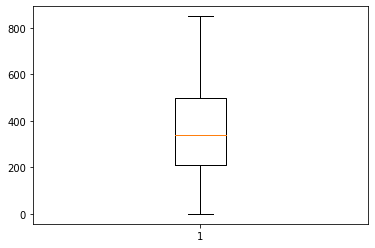

In [9]:
winsorized_Calories = winsorize(clean_data["Calories"], (0, 0.03))
plt.boxplot(winsorized_Calories)

{'whiskers': [<matplotlib.lines.Line2D at 0x1636990b588>,
 'caps': [<matplotlib.lines.Line2D at 0x1636990be08>,
 'boxes': [<matplotlib.lines.Line2D at 0x163699079c8>],
 'medians': [<matplotlib.lines.Line2D at 0x16369910f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369913f08>],
 'means': []}

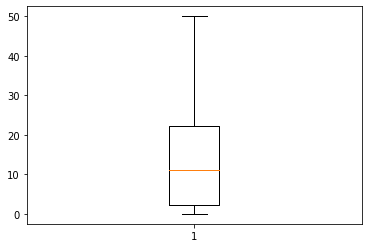

In [10]:
winsorized_TotFat = winsorize(clean_data["Total Fat"], (0, 0.02))
plt.boxplot(winsorized_TotFat)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369979f08>,
 'caps': [<matplotlib.lines.Line2D at 0x1636997bf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369979608>],
 'medians': [<matplotlib.lines.Line2D at 0x1636994b948>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369981988>],
 'means': []}

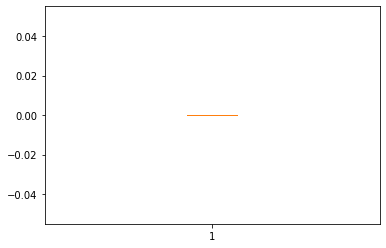

In [11]:
winsorized_TraFat = winsorize(clean_data["Trans Fat"], (0, 0.23))
plt.boxplot(winsorized_TraFat)

{'whiskers': [<matplotlib.lines.Line2D at 0x163699e6388>,
 'caps': [<matplotlib.lines.Line2D at 0x163699e6c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x163699e27c8>],
 'medians': [<matplotlib.lines.Line2D at 0x163699ecb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x163699f09c8>],
 'means': []}

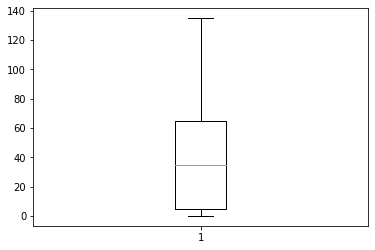

In [12]:
winsorized_Chol = winsorize(clean_data["Cholesterol"], (0, 0.07))
plt.boxplot(winsorized_Chol)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369a59f48>,
 'caps': [<matplotlib.lines.Line2D at 0x16369a5bf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369a59748>],
 'medians': [<matplotlib.lines.Line2D at 0x16369a60a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369a63a08>],
 'means': []}

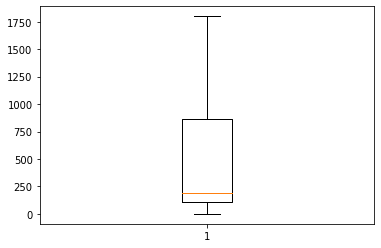

In [13]:
winsorized_Sod = winsorize(clean_data["Sodium"], (0, 0.02))
plt.boxplot(winsorized_Sod)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369ac6f88>,
 'caps': [<matplotlib.lines.Line2D at 0x16369ac9ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369ac6608>],
 'medians': [<matplotlib.lines.Line2D at 0x16369acde48>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369acdf48>],
 'means': []}

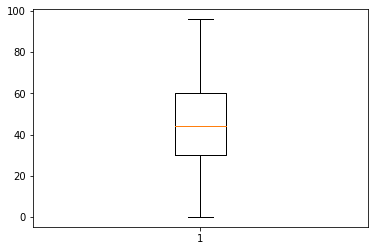

In [14]:
winsorized_Carb = winsorize(clean_data["Carbohydrates"], (0, 0.07))
plt.boxplot(winsorized_Carb)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369b309c8>,
 'caps': [<matplotlib.lines.Line2D at 0x16369b36948>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369b2af88>],
 'medians': [<matplotlib.lines.Line2D at 0x16369b398c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369b39f08>],
 'means': []}

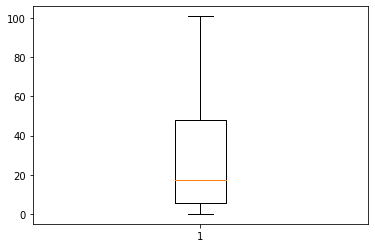

In [15]:
winsorized_Sug = winsorize(clean_data["Sugars"], (0, 0.02))
plt.boxplot(winsorized_Sug)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369b96f48>,
 'caps': [<matplotlib.lines.Line2D at 0x16369b9bf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369b96448>],
 'medians': [<matplotlib.lines.Line2D at 0x16369b9fe88>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369b9ff88>],
 'means': []}

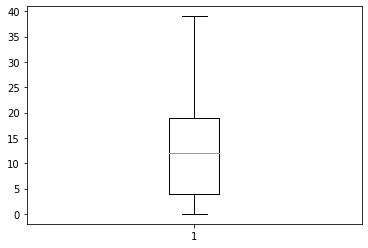

In [16]:
winsorized_Pro = winsorize(clean_data["Protein"], (0, 0.02))
plt.boxplot(winsorized_Pro)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369c09f88>,
 'caps': [<matplotlib.lines.Line2D at 0x16369c0df48>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369c094c8>],
 'medians': [<matplotlib.lines.Line2D at 0x16369c12ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369c12fc8>],
 'means': []}

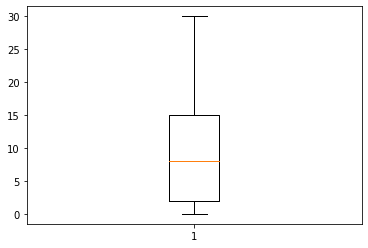

In [17]:
winsorized_VitA = winsorize(clean_data["Vitamin A (% Daily Value)"], (0, 0.07))
plt.boxplot(winsorized_VitA)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369c77408>,
 'caps': [<matplotlib.lines.Line2D at 0x16369c77c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369c74908>],
 'medians': [<matplotlib.lines.Line2D at 0x16369c7bc08>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369c7fa88>],
 'means': []}

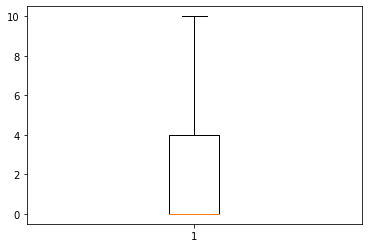

In [18]:
winsorized_VitC = winsorize(clean_data["Vitamin C (% Daily Value)"], (0, 0.18))
plt.boxplot(winsorized_VitC)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369cdafc8>,
 'caps': [<matplotlib.lines.Line2D at 0x16369cddfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369cda4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x16369ce2ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369ce7ac8>],
 'means': []}

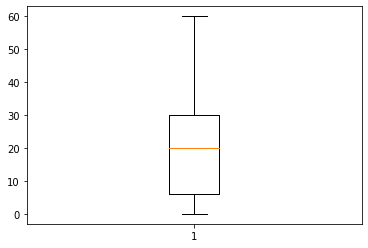

In [19]:
winsorized_Calcium = winsorize(clean_data["Calcium (% Daily Value)"], (0, 0.01))
plt.boxplot(winsorized_Calcium)

{'whiskers': [<matplotlib.lines.Line2D at 0x16369d4a348>,
 'caps': [<matplotlib.lines.Line2D at 0x16369d4abc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16369d477c8>],
 'medians': [<matplotlib.lines.Line2D at 0x16369d4eb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x16369d52b08>],
 'means': []}

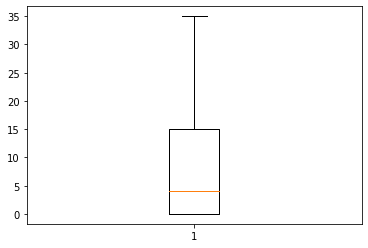

In [20]:
winsorized_Iron = winsorize(clean_data["Iron (% Daily Value)"], (0, 0.01))
plt.boxplot(winsorized_Iron)

In [21]:
clean_data['winsorized_Calories'] = winsorized_Calories
clean_data['winsorized_TotFat'] = winsorized_TotFat
clean_data['winsorized_TraFat'] = winsorized_TraFat
clean_data['winsorized_Chol'] = winsorized_Chol
clean_data['winsorized_Sod'] = winsorized_Sod
clean_data['winsorized_Carb'] = winsorized_Carb
clean_data['winsorized_Sug'] = winsorized_Sug
clean_data['winsorized_Pro'] = winsorized_Pro
clean_data['winsorized_VitA'] = winsorized_VitA
clean_data['winsorized_VitC'] = winsorized_VitC
clean_data['winsorized_Calcium'] = winsorized_Calcium
clean_data['winsorized_Iron'] = winsorized_Iron

In [22]:
clean_data = clean_data.drop(['Calories',
                             'Total Fat',
                             'Trans Fat',
                             'Cholesterol',
                             'Sodium',
                             'Carbohydrates',
                             'Sugars',
                             'Protein',
                             'Vitamin A (% Daily Value)',
                             'Vitamin C (% Daily Value)',
                             'Calcium (% Daily Value)',
                             'Iron (% Daily Value)',], axis=1)

In [23]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericsdata = clean_data.select_dtypes(include=numerics)

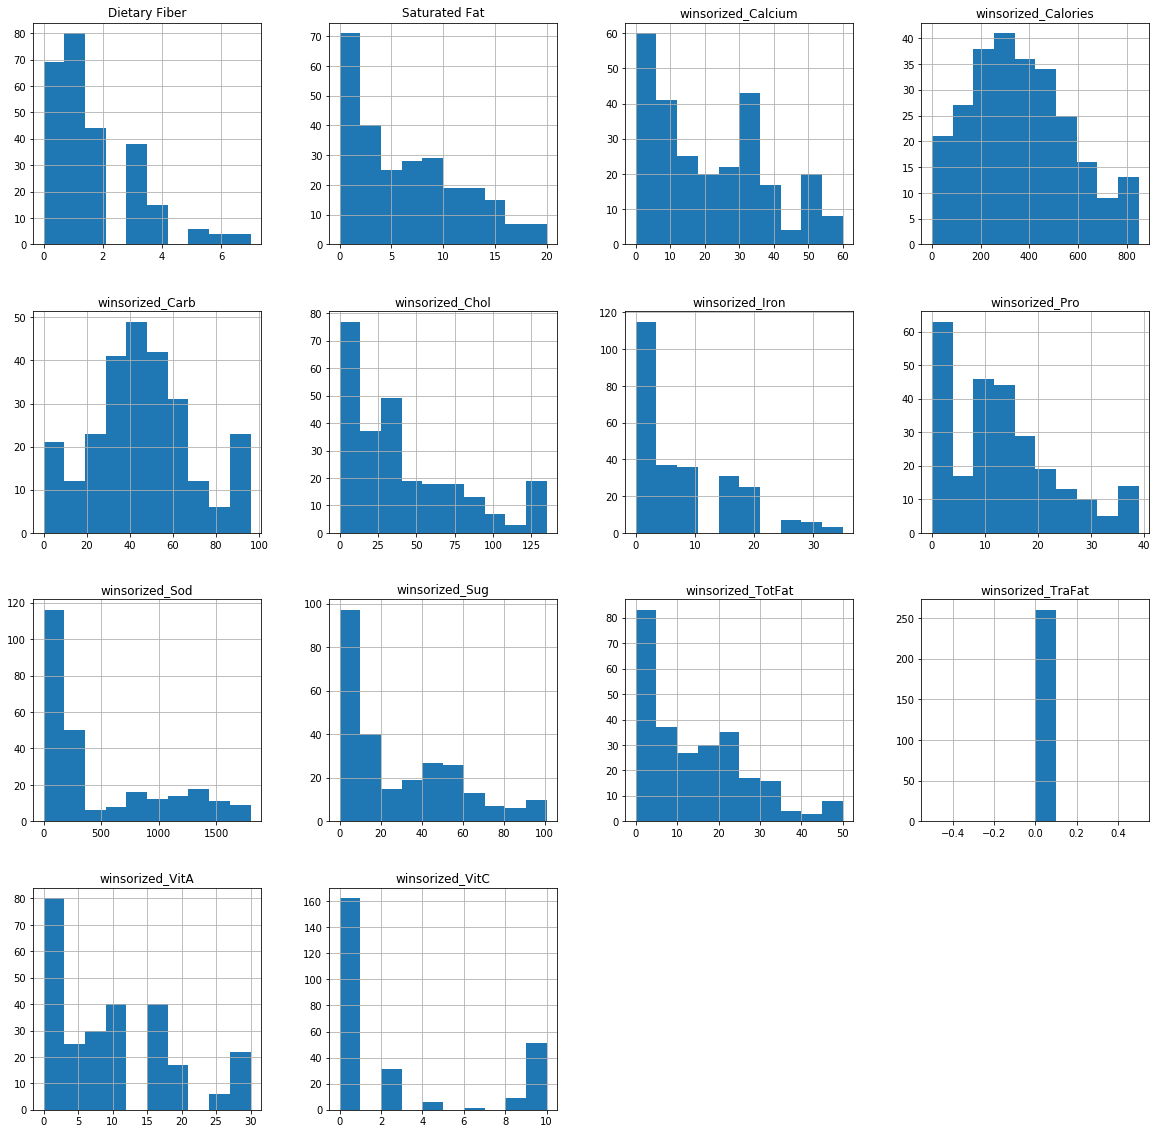

In [24]:
numericsdata.hist(figsize=(20,20))
plt.show()

In [25]:
import seaborn as sns

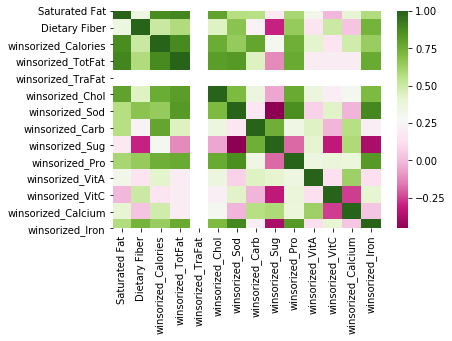

In [26]:
sns.heatmap(numericsdata.corr(), cmap='PiYG')

In [27]:
categorical = clean_data.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Category
9
Item
260
Serving Size
107


In [28]:
clean_data = clean_data.drop(['Item','Serving Size'], axis=1)

In [29]:
X = clean_data.drop(['Category'], axis=1)
Y = clean_data.Category

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(50,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [32]:
mlp.score(X, Y)

0.8653846153846154

In [33]:
Y.value_counts()/len(Y)

Coffee & Tea          0.365385
Breakfast             0.161538
Smoothies & Shakes    0.107692
Chicken & Fish        0.103846
Beverages             0.103846
Beef & Pork           0.057692
Snacks & Sides        0.050000
Desserts              0.026923
Salads                0.023077
Name: Category, dtype: float64

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([0.46153846, 0.51923077, 0.65384615, 0.59615385, 0.23076923])

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [36]:
mlp.score(X, Y)

0.9153846153846154

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([0.46153846, 0.59615385, 0.55769231, 0.48076923, 0.28846154])

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(150,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
mlp.score(X, Y)

0.8576923076923076

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([0.55769231, 0.59615385, 0.78846154, 0.53846154, 0.34615385])

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=(200,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [42]:
mlp.score(X, Y)

0.823076923076923

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([0.30769231, 0.57692308, 0.63461538, 0.5       , 0.40384615])

In [50]:
mlp = MLPClassifier(hidden_layer_sizes=(500,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
mlp.score(X, Y)

0.8615384615384616

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([0.32692308, 0.61538462, 0.61538462, 0.23076923, 0.28846154])